In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("Salary_Data.csv")

In [3]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# 1. Simple/Polynomial Linear Regression

### Run a simple linear regression using the Holdout method (train-test split) on salary data and plot the line plot of predicted vs the values from the test dataset.

In [4]:
def estimate_coefficients(x,y):
    #size of the dataset OR number of observations/points
    n = np.size(x)
    
    #mean of x and y
    #since we are using numpy just calling mean on numpy is sufficient
    mean_x, mean_y = np.mean(x), np.mean(y)
    
    #calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x - n*mean_y*mean_x)
    SS_xx = np.sum(x*x - n*mean_x*mean_x)
    
    #calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = mean_y - b_1*mean_x
    
    return(b_0, b_1)

Now let's split the data into "split" and "test" groups. Since we have 30 observations, let's do 80% of data for train and 20% for test.

In [5]:
# generating training by selecting 80% of the data randomly  
#train = data.sample(frac =.80) 
  
# checking if sample is 80% of data or not to ensure splitting data for train worked
  
#if (0.8*(len(data))== len(train)): 
#    print( "Yes, 80% of the data is in the train split, 80% of " + str(len(data)) + " is " + str(0.8*len(data)))
#    print(len(data), len(train)) 

In [6]:
X = data.iloc[:, 0:1].values

In [7]:
y = data.iloc[:, 1:2].values

In [9]:
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

In [138]:
#let's assign 80% of data to train and 20% to test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [139]:
b_0, b_1 = estimate_coefficients(X_train, y_train)

In [140]:
def plot_regression_line(x, y, b_0, b_1):
    #plotting the points as per dataset on a graph
    plt.scatter(x, y, color ="m", marker = "o", s = 30)
    
    #predicted response vector
    y_pred = b_0 + b_1 * x
    
    #plotting regression line
    plt.plot(x, y_pred, color = "g")
    
    #putting labels for x and y axis
    plt.xlabel('Size')
    plt.ylabel('Cost')
    
    #function to show plotted graph
    plt.show()

In [141]:
def main():
    #Dataset which we create
    x = X_train
    y = y_train
    
    #estimating coefficients
    b_0,b_1 = estimate_coefficients(x,y)
    print("Estimated coefficients:\nb_0 = {} \ nb_1 = {}".format(b_0, b_1))
    
    #plotting regression line
    plot_regression_line(x,y,b_0,b_1)

Estimated coefficients:
b_0 = -344.22804957018525 \ nb_1 = 14371.441551724374


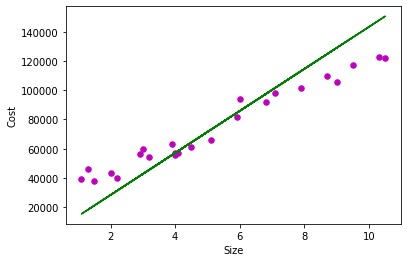

In [142]:
main()

We see our linear regression is not bad, but its underfitting the data

### Perform a polynomial regression of salary feature with degrees 2,3, and 4 and compare the results.

In [280]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

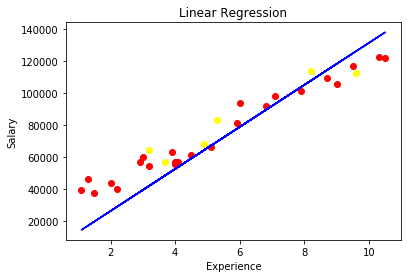

In [281]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(X_train, y_train)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X_train, y_train, color='red')
    plt.scatter(X_test, y_test, color='yellow')
    #the blue line below using the predicted function, is not actually predicting anything but we need it in order
    #to plot the line
    plt.plot(X_train, lin_reg.predict(X_train), color='blue')
    plt.title('Linear Regression')
    plt.xlabel('Experience')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

In [263]:
#here are the predicted values using the test data
lin_test = lin_reg.predict(X_test)
lin_test

array([[126281.46629273],
       [ 64456.16508692],
       [107865.41912504],
       [ 69717.89284911],
       [ 42093.82209758],
       [ 48670.98180032]])

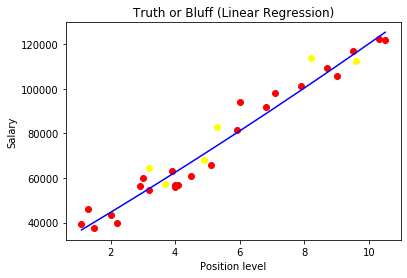

In [264]:
# Fitting Polynomial degree 2 to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
#create the polynomial for the x_train data
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression(fit_intercept=False)
#fit the x_train polynomial to the y_train
pol_reg.fit(X_poly, y_train)

#in order to plot the polynomial in sequential order, we need to order the x_train data points in sequential order
#while keeping them with their respective y_train data points.
#again, we use the predict function to plot the result of our polynomial fit

X_train_sorted,y_predicted_sorted = zip(*sorted(zip(X_train, pol_reg.predict(poly_reg.fit_transform(X_train)))))


# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X_train, y_train, color='red')
    plt.plot(X_train_sorted,y_predicted_sorted, color='blue')
    plt.scatter(X_test, y_test, color='yellow')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [265]:
#here are the predicted values using the test data
# we have to change the features of X_test to polynomial otherwise it wont work
poly2test = pol_reg.predict(poly_reg.transform(X_test))
poly2test

array([[116296.15408897],
       [ 70861.40566194],
       [102389.93092306],
       [ 74589.52490447],
       [ 55304.71530665],
       [ 59831.83996149]])

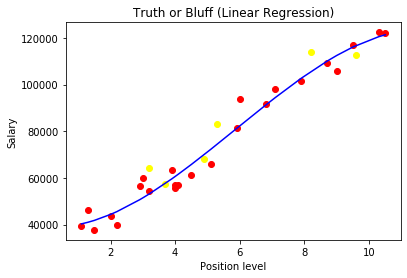

In [266]:
# Fitting Polynomial degree 3 to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
#create the polynomial for the x_train data
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression(fit_intercept=False)
#fit the x_train polynomial to the y_train
pol_reg.fit(X_poly, y_train)

#in order to plot the polynomial in sequential order, we need to order the x_train data points in sequential order
#while keeping them with their respective y_train data points.
#again, we use the predict function to plot the result of our polynomial fit

X_train_sorted,y_predicted_sorted = zip(*sorted(zip(X_train, pol_reg.predict(poly_reg.fit_transform(X_train)))))


# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X_train, y_train, color='red')
    plt.plot(X_train_sorted,y_predicted_sorted, color='blue')
    plt.scatter(X_test, y_test, color='yellow')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [267]:
poly3test = pol_reg.predict(poly_reg.transform(X_test))
poly3test

array([[116720.83404343],
       [ 70046.26332269],
       [105553.61621036],
       [ 74446.73204807],
       [ 53159.8488299 ],
       [ 57707.67750785]])

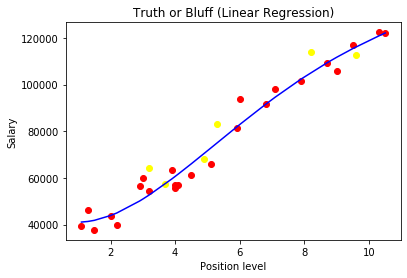

In [268]:
# Fitting Polynomial degree 4 to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
#create the polynomial for the x_train data
X_poly = poly_reg.fit_transform(X_train)
pol_reg = LinearRegression(fit_intercept=False)
#fit the x_train polynomial to the y_train
pol_reg.fit(X_poly, y_train)

#in order to plot the polynomial in sequential order, we need to order the x_train data points in sequential order
#while keeping them with their respective y_train data points.
#again, we use the predict function to plot the result of our polynomial fit

X_train_sorted,y_predicted_sorted = zip(*sorted(zip(X_train, pol_reg.predict(poly_reg.fit_transform(X_train)))))


# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X_train, y_train, color='red')
    plt.plot(X_train_sorted,y_predicted_sorted, color='blue')
    plt.scatter(X_test, y_test, color='yellow')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [269]:
poly4test = pol_reg.predict(poly_reg.transform(X_test))
poly4test

array([[116127.90403691],
       [ 70521.87794064],
       [105073.11064049],
       [ 75036.10503207],
       [ 52734.46641057],
       [ 57552.8996866 ]])

Using metrics to display fit score of our models versus the real test data

In [270]:
a4 = metrics.r2_score(poly4test, y_test)

In [271]:
a3= metrics.r2_score(poly3test, y_test)

In [272]:
a2 = metrics.r2_score(poly2test, y_test)

In [273]:
a1 = metrics.r2_score(lin_test, y_test)

Alternatively, we can gain an understanding of our model accuracey by taking the sum of squared differences between model and real test data

In [274]:
b4 = sum((poly4test - y_test)**2)

In [275]:
b3 = sum((poly3test - y_test)**2)

In [276]:
b2 = sum((poly2test - y_test)**2)

In [277]:
b1 = sum((lin_test - y_test)**2)

In [278]:
results = pd.DataFrame(np.array([['poly4',b4,a4 ], ['poly3', b3,a3], ['poly2', b2,a2],['linear',b1,a1]]),
                   columns=['model','sum_squared_differences', 'r2_score'])

In [279]:
results.sort_values('r2_score')

,model,sum_squared_differences,r2_score
3,linear,[984602593.6450146],0.824531
2,poly2,[315167498.2126488],0.893092
0,poly4,[297347023.56666064],0.909736
1,poly3,[291634891.9913265],0.912886
